In [2]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore")

## Exploratory Data Analysis

In [3]:
og_df = pd.read_csv('pokemon.csv')
og_df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


In [4]:
og_df['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

In [48]:
type_color_dict = {
    'grass': "#78C850",
    'fire': "#FF4422",
    'water': "#3399FF",
    'bug': "#A8B820",
    'normal': "#A8A878",
    'poison': "#A040A0",
    'electric': "#F8D030",
    'ground': "#E0C068",
    # 'fairy': "#EE99AC",
    'fairy': "#FF0037",
    'fighting': "#C03028",
    'psychic': "#F85888",
    'rock': "#8A7E46FF",
    'ghost': "#705898",
    'ice': "#98D8D8",
    'dragon': "#7038F8",
    'dark': "#705848",
    'steel': "#B8B8D0",
    'flying': "#A890F0"
}

In [6]:
og_df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [7]:
# Check for non-numeric values in 'capture_rate'
non_numeric_idx = []
for i, val in enumerate(og_df['capture_rate']):
    try:
        float(val)
    except ValueError:
        non_numeric_idx.append(i)
        print(f"Non-numeric value found: \"{val}\" in row {i}")

Non-numeric value found: "30 (Meteorite)255 (Core)" in row 773


In [8]:
# Handle Minior forms
minior_idx = non_numeric_idx[0]

# Create a copy for Minior (Meteorite)
minior_meteorite = og_df.loc[minior_idx].copy()
minior_meteorite['name'] = 'Minior (Meteorite)'
minior_meteorite['capture_rate'] = 30

# Update original to Minior (Core)
og_df.loc[minior_idx, 'name'] = 'Minior (Core)'
og_df.loc[minior_idx, 'capture_rate'] = 255

# Add the new row to the dataframe
og_df = pd.concat([og_df, minior_meteorite.to_frame().T], ignore_index=True)

In [9]:
# Find columns with missing values
cols_with_na = og_df.columns[og_df.isna().any()].tolist()
for attr in cols_with_na:
    print(f"Missing values in column '{attr}':")
    print(og_df[og_df[attr].isna()]['name'].tolist())

Missing values in column 'height_m':
['Rattata', 'Raticate', 'Raichu', 'Sandshrew', 'Sandslash', 'Vulpix', 'Ninetales', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Geodude', 'Graveler', 'Golem', 'Grimer', 'Muk', 'Exeggutor', 'Marowak', 'Hoopa', 'Lycanroc']
Missing values in column 'percentage_male':
['Magnemite', 'Magneton', 'Voltorb', 'Electrode', 'Staryu', 'Starmie', 'Ditto', 'Porygon', 'Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mew', 'Unown', 'Porygon2', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho-Oh', 'Celebi', 'Shedinja', 'Lunatone', 'Solrock', 'Baltoy', 'Claydol', 'Beldum', 'Metang', 'Metagross', 'Regirock', 'Regice', 'Registeel', 'Kyogre', 'Groudon', 'Rayquaza', 'Jirachi', 'Deoxys', 'Bronzor', 'Bronzong', 'Magnezone', 'Porygon-Z', 'Rotom', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Regigigas', 'Giratina', 'Phione', 'Manaphy', 'Darkrai', 'Shaymin', 'Arceus', 'Victini', 'Klink', 'Klang', 'Klinklang', 'Cryogonal', 'Golett', 'Golurk', 'Cobalion', 'Terrakion', 'Virizion', 'Resh

In [10]:
# Fill height and weight missing values with real values

og_df.loc[og_df['name'] == 'Rattata', 'height_m'] = 0.3
og_df.loc[og_df['name'] == 'Rattata', 'weight_kg'] = 3.5

og_df.loc[og_df['name'] == 'Raticate', 'height_m'] = 0.7
og_df.loc[og_df['name'] == 'Raticate', 'weight_kg'] = 18.5

og_df.loc[og_df['name'] == 'Raichu', 'height_m'] = 0.8
og_df.loc[og_df['name'] == 'Raichu', 'weight_kg'] = 30

og_df.loc[og_df['name'] == 'Sandshrew', 'height_m'] = 0.6
og_df.loc[og_df['name'] == 'Sandshrew', 'weight_kg'] = 12

og_df.loc[og_df['name'] == 'Sandslash', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Sandslash', 'weight_kg'] = 29.5

og_df.loc[og_df['name'] == 'Vulpix', 'height_m'] = 0.6
og_df.loc[og_df['name'] == 'Vulpix', 'weight_kg'] = 9.9

og_df.loc[og_df['name'] == 'Ninetales', 'height_m'] = 1.1
og_df.loc[og_df['name'] == 'Ninetales', 'weight_kg'] = 19.9

og_df.loc[og_df['name'] == 'Diglett', 'height_m'] = 0.2
og_df.loc[og_df['name'] == 'Diglett', 'weight_kg'] = 0.8

og_df.loc[og_df['name'] == 'Dugtrio', 'height_m'] = 0.7
og_df.loc[og_df['name'] == 'Dugtrio', 'weight_kg'] = 33.3

og_df.loc[og_df['name'] == 'Meowth', 'height_m'] = 0.4
og_df.loc[og_df['name'] == 'Meowth', 'weight_kg'] = 4.2

og_df.loc[og_df['name'] == 'Persian', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Persian', 'weight_kg'] = 32

og_df.loc[og_df['name'] == 'Geodude', 'height_m'] = 0.4
og_df.loc[og_df['name'] == 'Geodude', 'weight_kg'] = 20

og_df.loc[og_df['name'] == 'Graveler', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Graveler', 'weight_kg'] = 105

og_df.loc[og_df['name'] == 'Golem', 'height_m'] = 1.4
og_df.loc[og_df['name'] == 'Golem', 'weight_kg'] = 300

og_df.loc[og_df['name'] == 'Grimer', 'height_m'] = 0.9
og_df.loc[og_df['name'] == 'Grimer', 'weight_kg'] = 30

og_df.loc[og_df['name'] == 'Muk', 'height_m'] = 1.2
og_df.loc[og_df['name'] == 'Muk', 'weight_kg'] = 30

og_df.loc[og_df['name'] == 'Exeggutor', 'height_m'] = 2
og_df.loc[og_df['name'] == 'Exeggutor', 'weight_kg'] = 120

og_df.loc[og_df['name'] == 'Marowak', 'height_m'] = 1
og_df.loc[og_df['name'] == 'Marowak', 'weight_kg'] = 45

og_df.loc[og_df['name'] == 'Hoopa', 'height_m'] = 6.5
og_df.loc[og_df['name'] == 'Hoopa', 'weight_kg'] = 490

og_df.loc[og_df['name'] == 'Lycanroc', 'height_m'] = 1.1
og_df.loc[og_df['name'] == 'Lycanroc', 'weight_kg'] = 25

In [11]:
# Handle sexless pokemon
# og_df['percentage_male'] = pd.to_numeric(og_df['percentage_male'], errors='coerce')

# Create new column percentage_female with percentage_male counterpart, both set to 0 if pokemon is sexless
og_df['percentage_female'] = og_df['percentage_male'].apply(lambda x: 100 - x if not pd.isna(x) else 0)
og_df['percentage_male'] = og_df['percentage_male'].fillna(0)

# Check if all NaNs are gone
cols_with_na = og_df.columns[og_df.isna().any()].tolist()
cols_with_na

['type2']

In [12]:
# Remove name, japanese name, classification, abilities and type match-up attributes
df = og_df.copy()
for attr in og_df.columns:
    if attr in ['name', 'japanese_name', 'classfication', 'abilities'] or attr.startswith('against_'):
        df = df.drop(columns=[attr])

In [13]:
# Make attributes numerical
for attr in df.columns:
    if attr not in ['type1', 'type2']:
        df[attr] = pd.to_numeric(df[attr])

df

,attack,base_egg_steps,base_happiness,base_total,capture_rate,defense,experience_growth,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,percentage_female
0,49,5120,70,318,45,49,1059860,0.7,45,88.1,1,65,65,45,grass,poison,6.9,1,0,11.9
1,62,5120,70,405,45,63,1059860,1.0,60,88.1,2,80,80,60,grass,poison,13.0,1,0,11.9
2,100,5120,70,625,45,123,1059860,2.0,80,88.1,3,122,120,80,grass,poison,100.0,1,0,11.9
3,52,5120,70,309,45,43,1059860,0.6,39,88.1,4,60,50,65,fire,NaN,8.5,1,0,11.9
4,64,5120,70,405,45,58,1059860,1.1,58,88.1,5,80,65,80,fire,NaN,19.0,1,0,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,181,30720,0,570,255,131,1250000,0.3,59,0.0,798,59,31,109,grass,steel,0.1,7,1,0.0
798,101,30720,0,570,15,53,1250000,5.5,223,0.0,799,97,53,43,dark,dragon,888.0,7,1,0.0
799,107,30720,0,600,3,101,1250000,2.4,97,0.0,800,127,89,79,psychic,NaN,230.0,7,1,0.0
800,95,30720,0,600,3,115,1250000,1.0,80,0.0,801,130,115,65,steel,fairy,80.5,7,1,0.0


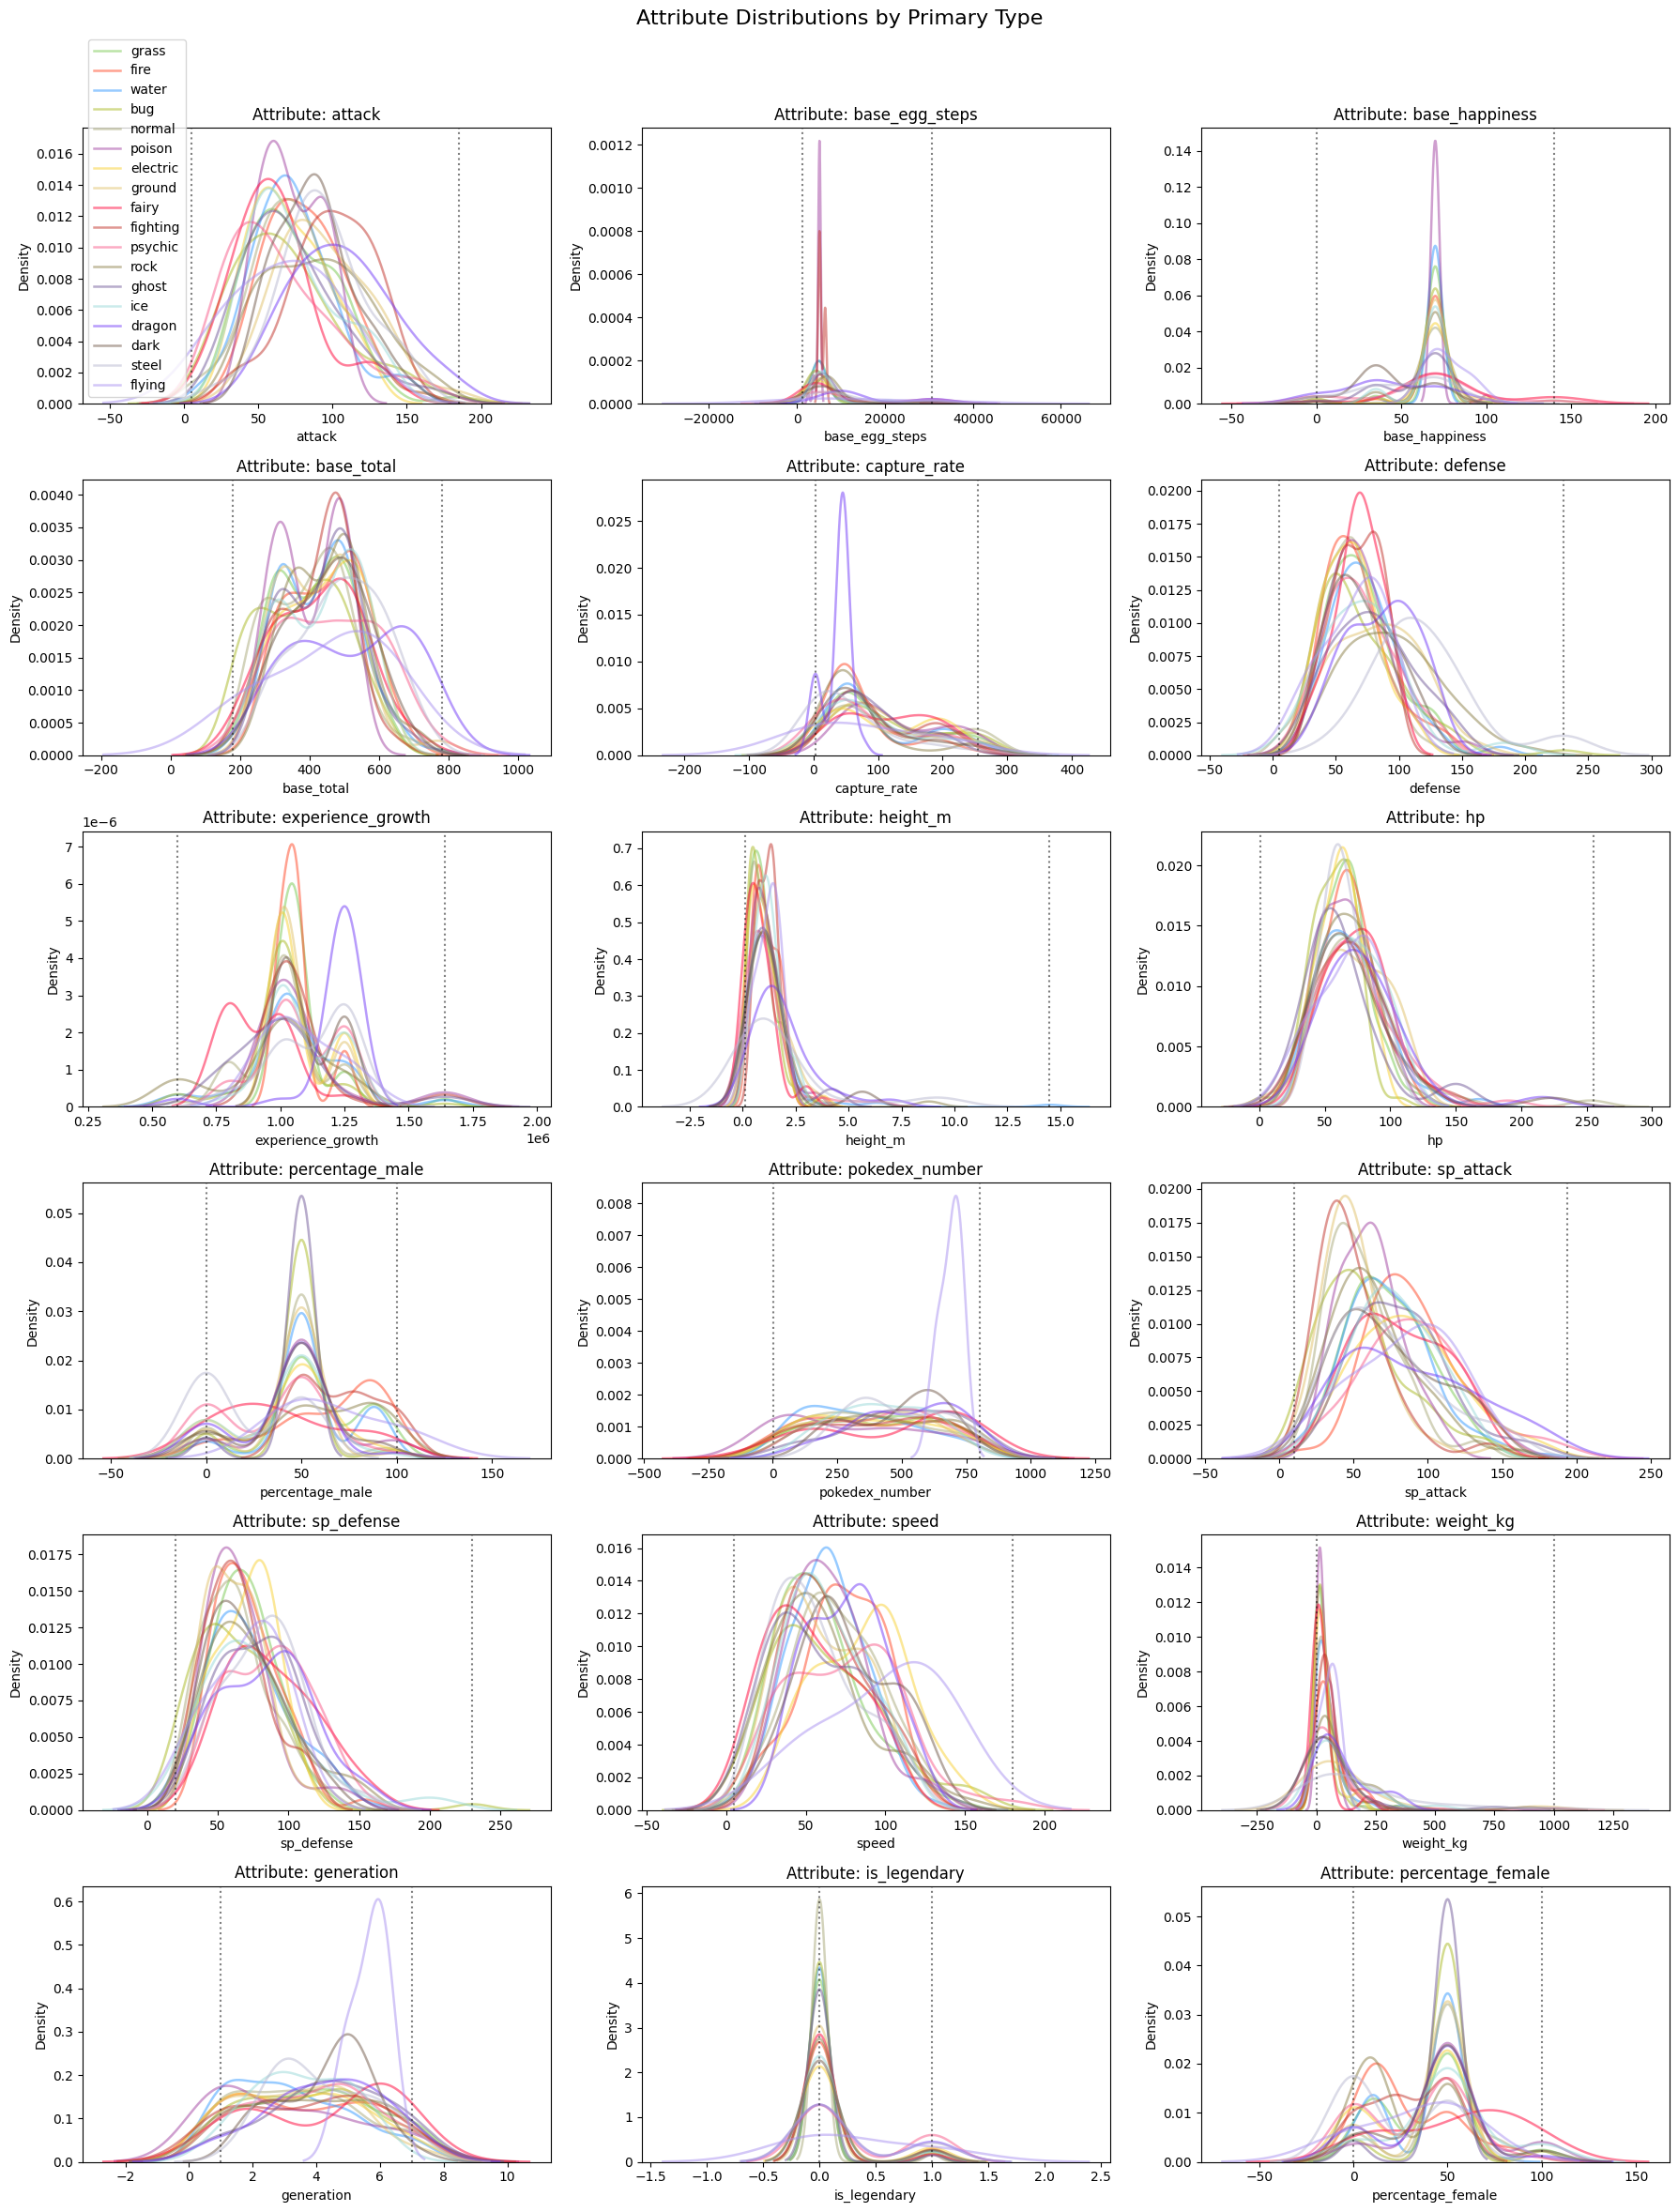

In [81]:
fig, axes = plt.subplots(6, 3, figsize=(18, 24))
axes = axes.flatten()

attributes = [col for col in df if col not in ['type1', 'type2']]

for i, attr in enumerate(attributes):
    # Get min and max value for current attribute
    max_val = df[attr].max()
    min_val = df[attr].min()
    
    # Plot KDE for each type1
    for t in df['type1'].unique():
        subset = df[df['type1'] == t][attr].dropna()
        sns.kdeplot(subset, ax=axes[i], label=t, color=type_color_dict[t], fill=False, alpha=0.5, linewidth=1.8)
    
    # Plot min and max values
    axes[i].axvline(min_val, color='black', linestyle=':', alpha=0.5, linewidth=1.5)
    axes[i].axvline(max_val, color='black', linestyle=':', alpha=0.5, linewidth=1.5)

    axes[i].set_title(f'Attribute: {attr}')
    if i == 0:
        axes[i].legend()

fig.suptitle('Attribute Distributions by Primary Type', fontsize=16)
plt.tight_layout()
plt.show()